In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
exp9_measure_4_df = pd.read_csv('./csv/exp9_measure_04.csv', sep=',')

In [3]:
exp9_measure_4_df

,Timestamp,Relative_Time,reference_M_Pa,HPL1_cr_01,HPL3_cr_03,HPL4_cr_04
0,2025-06-30 09:24:43.767,782.016,0.0,-196516,-85577,43359
1,2025-06-30 09:24:43.768,782.017,0.0,-196516,-85577,43361
2,2025-06-30 09:24:43.768,782.017,0.0,-196547,-85577,43361
3,2025-06-30 09:24:43.813,782.062,0.0,-196547,-85577,43361
4,2025-06-30 09:24:43.813,782.062,0.0,-196547,-85577,43361
...,...,...,...,...,...,...
25878,2025-06-30 09:27:26.023,944.272,0.0,-196990,-86129,43604
25879,2025-06-30 09:27:26.023,944.272,0.0,-196990,-86208,43604
25880,2025-06-30 09:27:26.023,944.272,0.0,-196990,-86208,43604
25881,2025-06-30 09:27:26.024,944.273,0.0,-196877,-86208,43604


In [4]:
exp9_measure_4_df = exp9_measure_4_df.dropna()

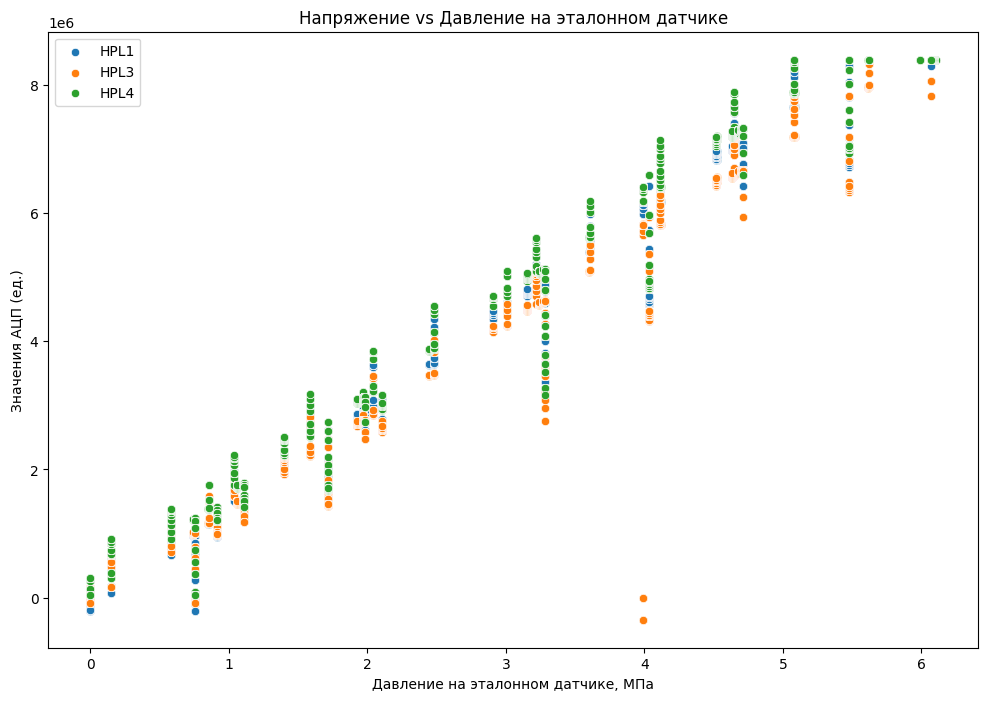

In [5]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=exp9_measure_4_df, x='reference_M_Pa', y='HPL1_cr_01', label='HPL1')
sns.scatterplot(data=exp9_measure_4_df, x='reference_M_Pa', y='HPL3_cr_03', label='HPL3')
sns.scatterplot(data=exp9_measure_4_df, x='reference_M_Pa', y='HPL4_cr_04', label='HPL4')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Значения АЦП (ед.)')
plt.title('Напряжение vs Давление на эталонном датчике')
plt.legend()
plt.savefig(f'./results/fig/exp_data.png')
plt.show()

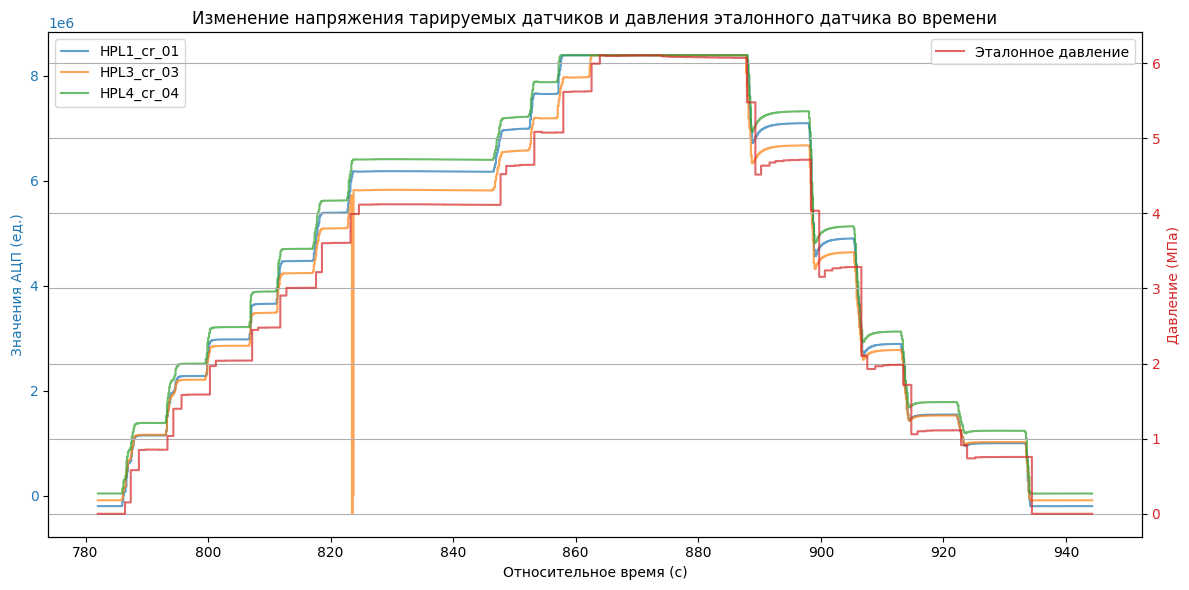

In [6]:
# Создание графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая шкала Y для тарируемых датчиков
ax1.set_xlabel('Относительное время (с)')
ax1.set_ylabel('Значения АЦП (ед.)', color='tab:blue')
ax1.plot(exp9_measure_4_df['Relative_Time'], exp9_measure_4_df['HPL1_cr_01'], label='HPL1_cr_01', color='tab:blue', alpha=0.7)
ax1.plot(exp9_measure_4_df['Relative_Time'], exp9_measure_4_df['HPL3_cr_03'], label='HPL3_cr_03', color='tab:orange', alpha=0.7)
ax1.plot(exp9_measure_4_df['Relative_Time'], exp9_measure_4_df['HPL4_cr_04'], label='HPL4_cr_04', color='tab:green', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Вторая шкала Y для эталонного датчика давления
ax2 = ax1.twinx()
ax2.set_ylabel('Давление (МПа)', color='tab:red')
ax2.plot(exp9_measure_4_df['Relative_Time'], exp9_measure_4_df['reference_M_Pa'], label='Эталонное давление', color='tab:red', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Настройка графика
plt.title('Изменение напряжения тарируемых датчиков и давления эталонного датчика во времени')
plt.grid()
plt.tight_layout()
plt.savefig(f'./results/fig/exp_data_time.png')
# Показ графика
plt.show()

In [7]:
# Находим моменты времени, когда значение эталонного датчика изменяется
reference_changes = exp9_measure_4_df['reference_M_Pa'].diff().abs() > 0

In [8]:
# Извлекаем времена обновления данных эталонного датчика
update_times = exp9_measure_4_df.loc[reference_changes, 'Relative_Time']

In [9]:
# Вычисляем разницу времени между обновлениями
update_intervals = update_times.diff().dropna()

In [10]:
# Находим минимальный интервал времени между обновлениями
min_update_interval = update_intervals.min()

In [11]:
print(f"Минимальный интервал времени между обновлениями данных эталонного датчика: {min_update_interval:.5f} секунд")

Минимальный интервал времени между обновлениями данных эталонного датчика: 0.91400 секунд


In [12]:
# Выбор данных с шагом, близким к минимальному интервалу обновления
selected_data = exp9_measure_4_df.iloc[::int(min_update_interval / (exp9_measure_4_df['Relative_Time'].diff().mean()))]


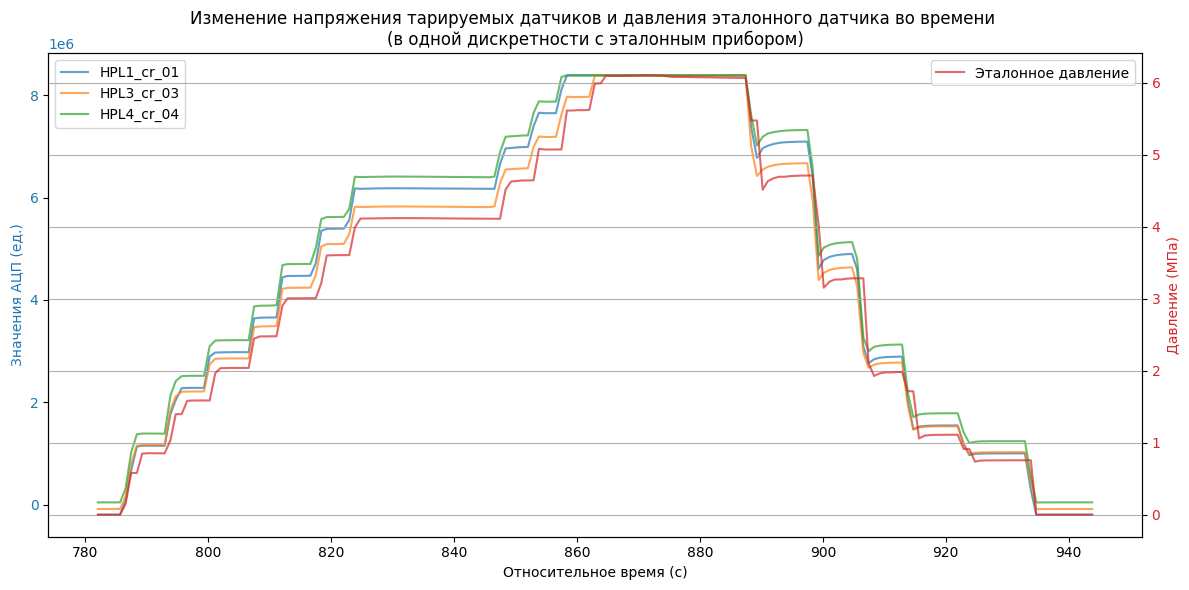

In [13]:
# Создание графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая шкала Y для тарируемых датчиков
ax1.set_xlabel('Относительное время (с)')
ax1.set_ylabel('Значения АЦП (ед.)', color='tab:blue')
ax1.plot(selected_data['Relative_Time'], selected_data['HPL1_cr_01'], label='HPL1_cr_01', color='tab:blue', alpha=0.7)
ax1.plot(selected_data['Relative_Time'], selected_data['HPL3_cr_03'], label='HPL3_cr_03', color='tab:orange', alpha=0.7)
ax1.plot(selected_data['Relative_Time'], selected_data['HPL4_cr_04'], label='HPL4_cr_04', color='tab:green', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Вторая шкала Y для эталонного датчика давления
ax2 = ax1.twinx()
ax2.set_ylabel('Давление (МПа)', color='tab:red')
ax2.plot(selected_data['Relative_Time'], selected_data['reference_M_Pa'], label='Эталонное давление', color='tab:red', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Настройка графика
plt.title('Изменение напряжения тарируемых датчиков и давления эталонного датчика во времени \n(в одной дискретности с эталонным прибором)')
plt.grid()
plt.tight_layout()
plt.savefig(f'./results/fig/exp_data_time_high_sampling.png')
# Показ графика
plt.show()


In [14]:
selected_data

,Timestamp,Relative_Time,reference_M_Pa,HPL1_cr_01,HPL3_cr_03,HPL4_cr_04
0,2025-06-30 09:24:43.767,782.016,0.0,-196516,-85577,43359
145,2025-06-30 09:24:44.672,782.921,0.0,-196499,-85544,43379
290,2025-06-30 09:24:45.534,783.783,0.0,-196360,-85501,43397
435,2025-06-30 09:24:46.501,784.749,0.0,-196451,-85425,43391
580,2025-06-30 09:24:47.377,785.625,0.0,-196319,-85439,43451
...,...,...,...,...,...,...
25230,2025-06-30 09:27:21.872,940.121,0.0,-197044,-86268,43501
25375,2025-06-30 09:27:22.842,941.091,0.0,-196981,-86266,43522
25520,2025-06-30 09:27:23.752,942.001,0.0,-196886,-86261,43536
25665,2025-06-30 09:27:24.658,942.907,0.0,-196850,-86188,43539


In [15]:
# Вычисление производной давления по времени
selected_data['reference_M_Pa_diff'] = selected_data['reference_M_Pa'].diff() / selected_data['Relative_Time'].diff()
selected_data['HPL1_cr_01_diff'] = selected_data['HPL1_cr_01'].diff() / selected_data['Relative_Time'].diff()
selected_data['HPL3_cr_03_diff'] = selected_data['HPL3_cr_03'].diff() / selected_data['Relative_Time'].diff()
selected_data['HPL4_cr_04_diff'] = selected_data['HPL4_cr_04'].diff() / selected_data['Relative_Time'].diff()

/tmp/ipykernel_58424/3390140643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['reference_M_Pa_diff'] = selected_data['reference_M_Pa'].diff() / selected_data['Relative_Time'].diff()
/tmp/ipykernel_58424/3390140643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['HPL1_cr_01_diff'] = selected_data['HPL1_cr_01'].diff() / selected_data['Relative_Time'].diff()
/tmp/ipykernel_58424/3390140643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [16]:
selected_data.to_excel('./results/selected_data.xlsx')

In [17]:
# Установка порога для определения установившегося режима
stabilization_threshold = 0.01  # Задайте порог, например, 0.001 МПа/с

In [18]:
# Установка порога для определения установившегося режима
stabilization_threshold_HPL = 400  # Задайте порог, например, 0.001 МПа/с

In [19]:
# Фильтрация данных: выбираем строки, где производная давления близка к нулю
stable_data = selected_data[
    (selected_data['reference_M_Pa_diff'].abs() < stabilization_threshold)&
    (selected_data['HPL1_cr_01_diff'].abs() < stabilization_threshold_HPL)&
    (selected_data['HPL3_cr_03_diff'].abs() < stabilization_threshold_HPL)&
    (selected_data['HPL4_cr_04_diff'].abs() < stabilization_threshold_HPL)
    
]

In [20]:
stable_data.to_excel('./results/stable_data.xlsx')

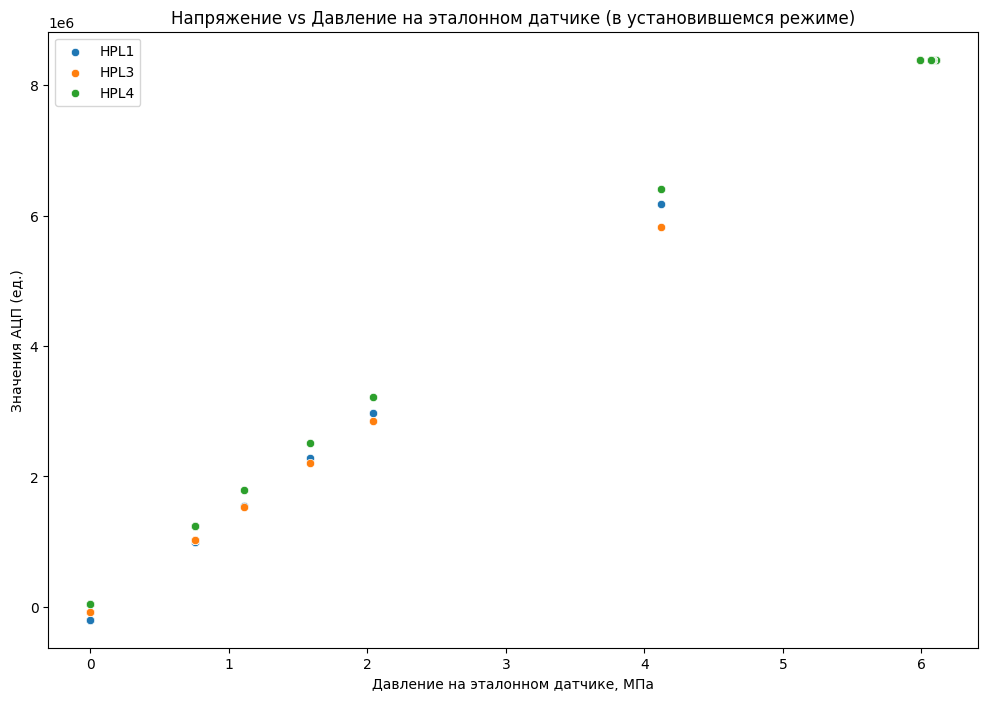

In [21]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=stable_data, x='reference_M_Pa', y='HPL1_cr_01', label='HPL1')
sns.scatterplot(data=stable_data, x='reference_M_Pa', y='HPL3_cr_03', label='HPL3')
sns.scatterplot(data=stable_data, x='reference_M_Pa', y='HPL4_cr_04', label='HPL4')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Значения АЦП (ед.)')
plt.title('Напряжение vs Давление на эталонном датчике (в установившемся режиме)')
plt.legend()
plt.savefig(f'./results/fig/exp_data_stable_data.png')
plt.show()

In [22]:
# Удалим данные более 6 МПа
stable_data_filtered = stable_data[stable_data['reference_M_Pa']<5.5]

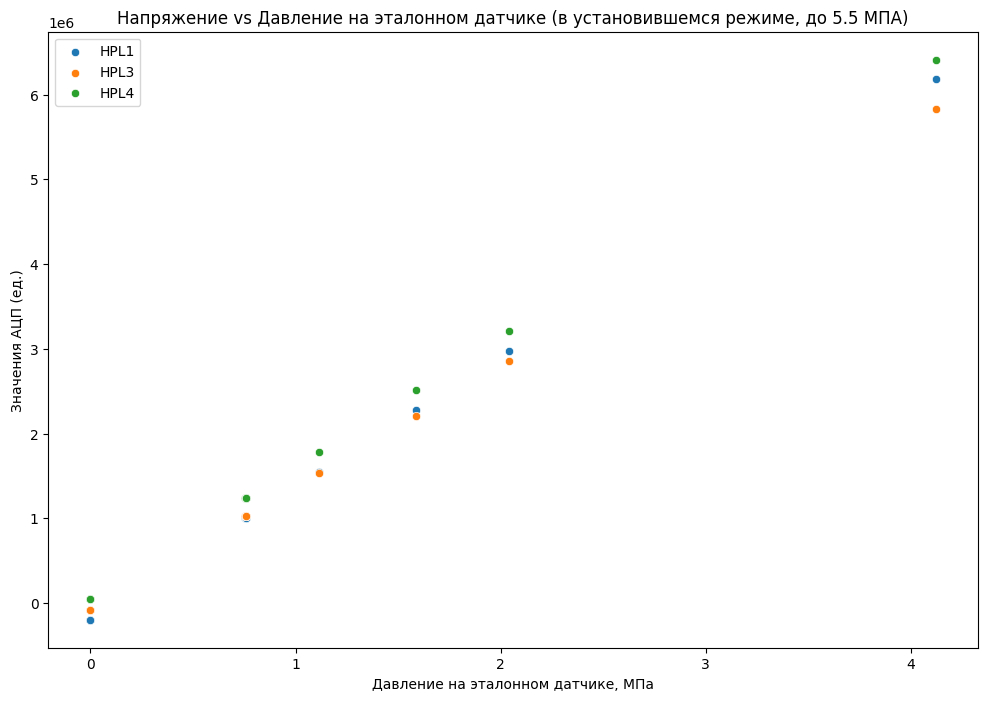

In [23]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=stable_data_filtered, x='reference_M_Pa', y='HPL1_cr_01', label='HPL1')
sns.scatterplot(data=stable_data_filtered, x='reference_M_Pa', y='HPL3_cr_03', label='HPL3')
sns.scatterplot(data=stable_data_filtered, x='reference_M_Pa', y='HPL4_cr_04', label='HPL4')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Значения АЦП (ед.)')
plt.title('Напряжение vs Давление на эталонном датчике (в установившемся режиме, до 5.5 МПА)')
plt.legend()
plt.savefig(f'./results/fig/exp_data_stable_data_limit.png')
plt.show()

In [24]:
def plot_regression_with_error(df, sensor_voltage, sensor_name):
    # Подготовка данных
    x = df[sensor_voltage].values.reshape(-1, 1)
    y = df['reference_M_Pa'].values

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(x, y)

    # Получение коэффициентов регрессии
    coef = model.coef_[0]
    intercept = model.intercept_

    # Предсказанные значения
    y_pred = model.predict(x)

    # Вычисление коэффициента детерминации R^2 и средней квадратичной ошибки
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Вычисление средней относительной ошибки
    relative_errors = np.abs((y - y_pred) / y) * 100
    mean_relative_error = np.mean(relative_errors)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Данные измерений')
    plt.plot(x, y_pred, color='red', label=f'Линия регрессии: y = {coef:.4f}x + {intercept:.4f}')
    plt.xlabel('Значения АЦП (ед.)')
    plt.ylabel('Давление на эталонном датчике, МПа')
    plt.title(f'Линия регрессии. {sensor_name}\n$R^2 = {r2:.4f}$, MSE = {mse:.4f}, MRE = {mean_relative_error:.2f}%')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./results/fig/regression_{sensor_name}.png')
    plt.show()
    print(f'{sensor_name} y = {coef}x + {intercept}')

    # Построение графика остатков
    residuals = y - y_pred
    plt.figure(figsize=(10, 4))
    plt.scatter(x, residuals, color='purple')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Значения АЦП (ед.)')
    plt.ylabel('Остатки, МПа')
    plt.title(f'График остатков. {sensor_name}')
    plt.grid(True)
    plt.savefig(f'./results/fig/residuals_{sensor_name}.png')
    plt.show()


/tmp/ipykernel_58424/2059767809.py:22: RuntimeWarning: divide by zero encountered in divide
  relative_errors = np.abs((y - y_pred) / y) * 100


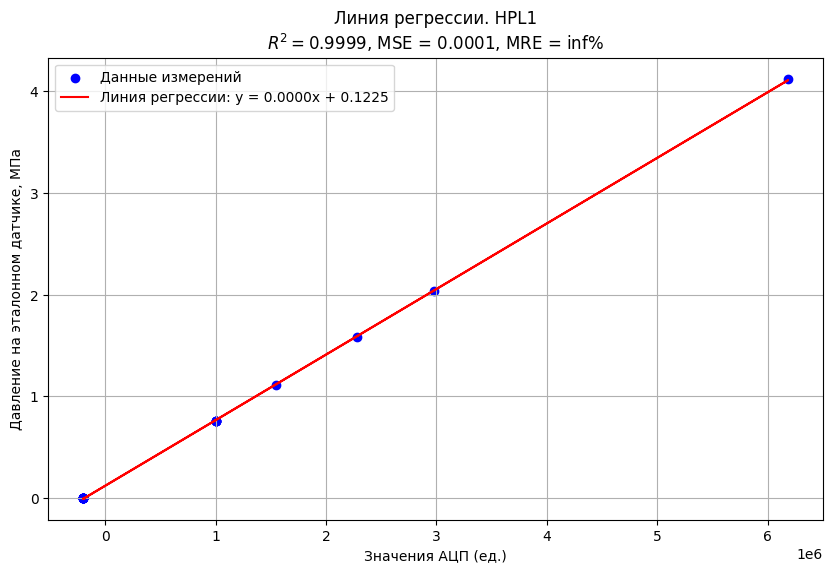

HPL1 y = 6.444603147629078e-07x + 0.12245793119992415


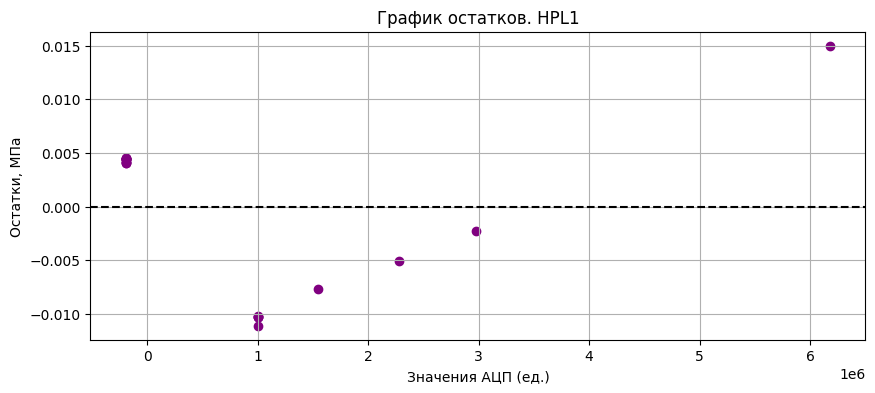

In [25]:
# Построение графиков для каждого датчика
plot_regression_with_error(stable_data_filtered, 'HPL1_cr_01', 'HPL1')

/tmp/ipykernel_58424/2059767809.py:22: RuntimeWarning: divide by zero encountered in divide
  relative_errors = np.abs((y - y_pred) / y) * 100


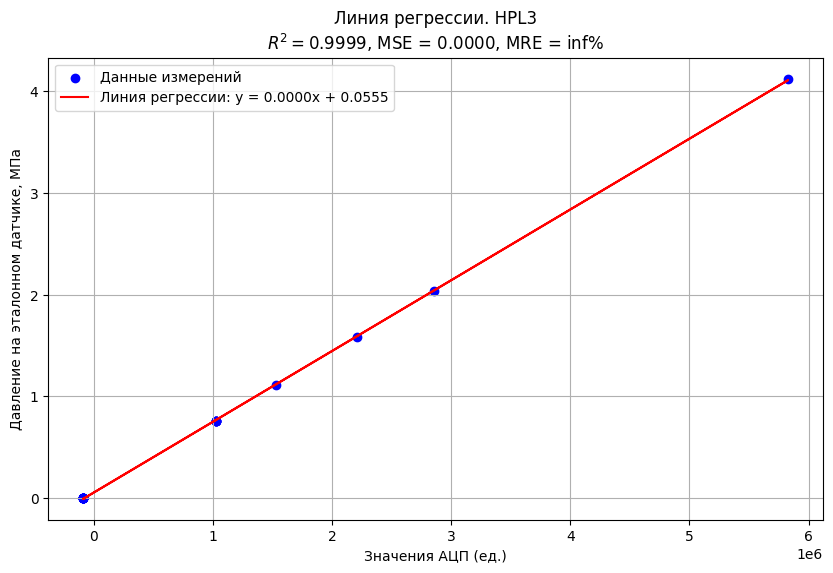

HPL3 y = 6.953993224553024e-07x + 0.05554528114321866


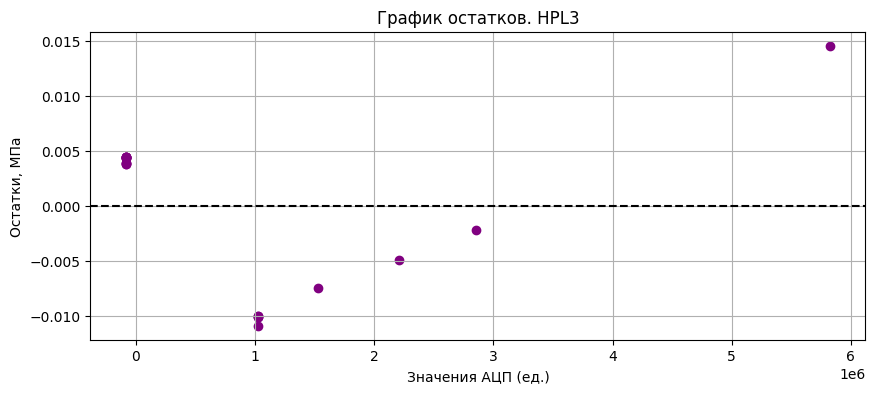

In [26]:
plot_regression_with_error(stable_data_filtered,'HPL3_cr_03', 'HPL3')

/tmp/ipykernel_58424/2059767809.py:22: RuntimeWarning: divide by zero encountered in divide
  relative_errors = np.abs((y - y_pred) / y) * 100


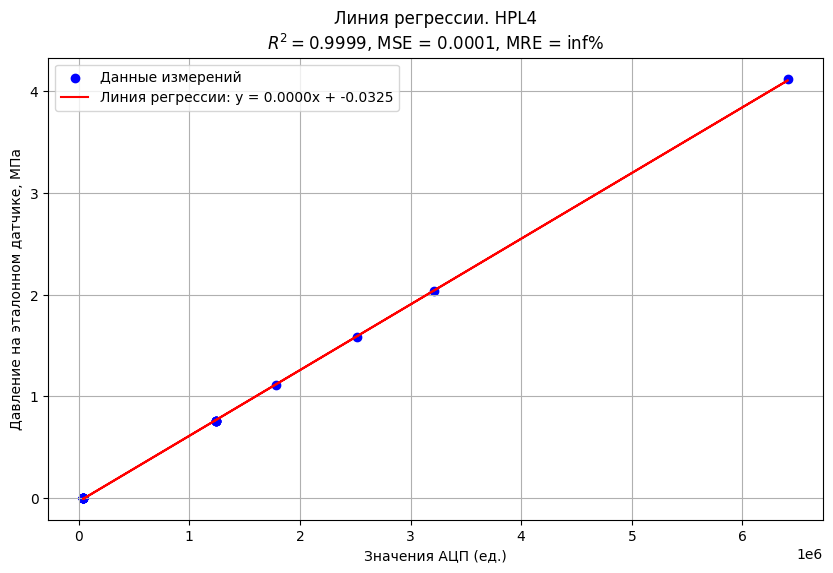

HPL4 y = 6.456588649070146e-07x + -0.03253430956763925


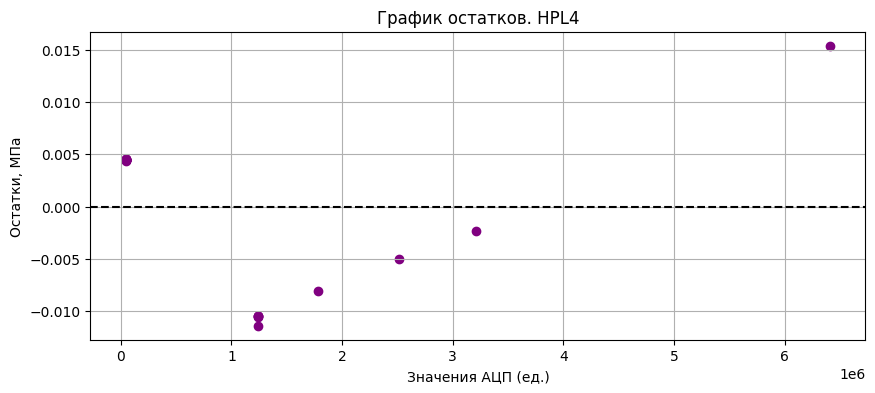

In [27]:
plot_regression_with_error(stable_data_filtered,'HPL4_cr_04', 'HPL4')

Коэффициент детерминации 1 указывает на то, что модель линейной регрессии очень хорошо объясняет вариацию данных. Это означает, что существует сильная линейная зависимость между напряжением на датчиках и эталонным давлением в МПа.